# Kiva Crowd-Funding Data Visualization

In [44]:
import seaborn as sns

sns.set()
sns.set_style('darkgrid', {
    'font_scale': '1.3',
    "axes.facecolor": ".9"
    }
)

In [79]:
%run narcos/kiva_data.py
kiva_data = KivaData(use_sample=True)
loan_data = kiva_data.loan_data

# Summary Statistics

### By Sector
By sector, the wholesale has highest median loan amount but very few loans. Agiculture, food and retail rank top 3 in term of number of loans.

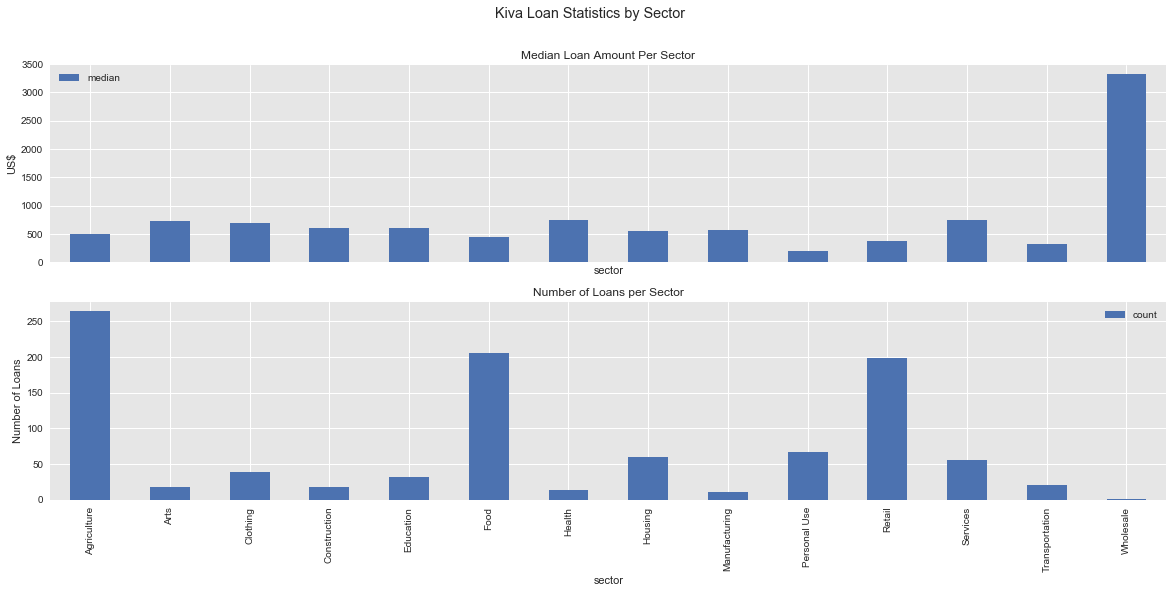

In [143]:
fig = plt.figure(figsize=(20,8))
fig.suptitle("Kiva Loan Statistics by Sector")

ax1 = plt.subplot2grid((2, 1), (0, 0))
loan_data.groupby('sector')['funded_amount'].agg( ['median']).plot.bar(
    ax=ax1
)
ax1.tick_params(
    axis='x',
    labelbottom='off',
    bottom='off'
)
plt.ylabel('US$')
plt.title('Median Loan Amount Per Sector')

loan_data.groupby('sector')['funded_amount'].agg( ['count']).plot.bar(
    ax=plt.subplot2grid((2, 1), (1, 0))
)
plt.ylabel('Number of Loans')
plt.title('Number of Loans per Sector')
plt.show()

### By Country (and Gender)

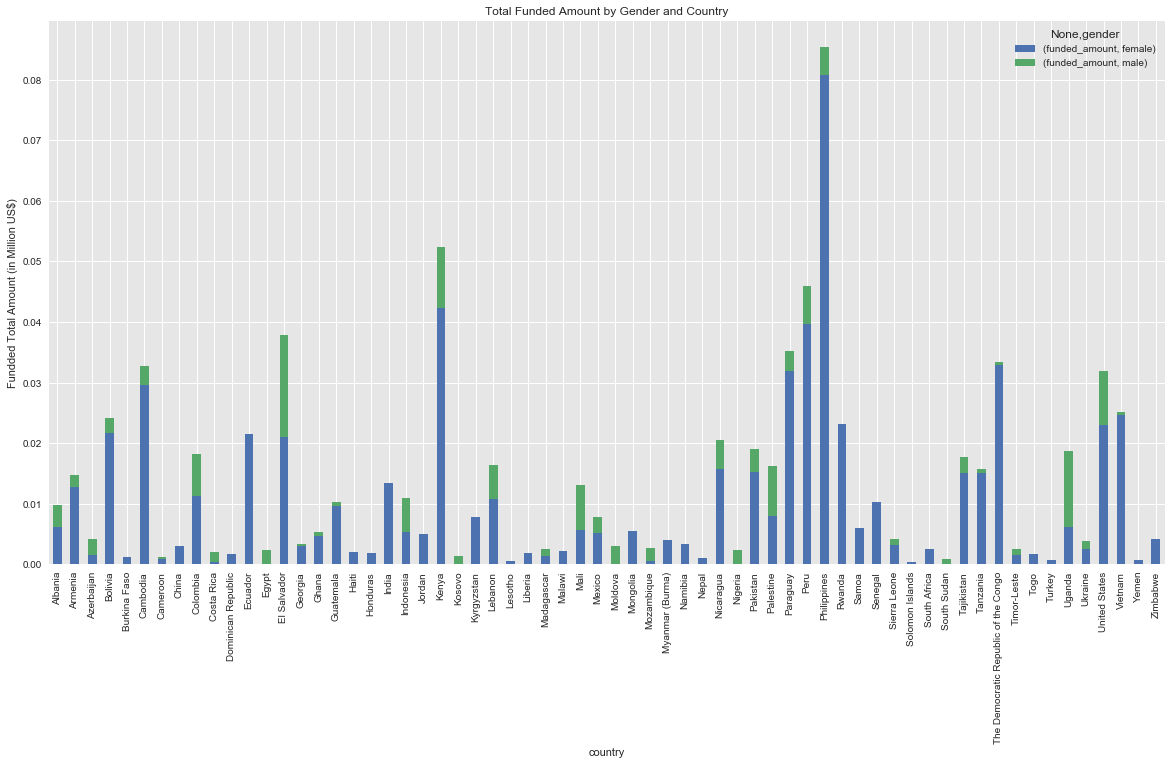

In [118]:
figure, ax = plt.subplots(figsize=(20,10))
(loan_data.groupby(
       ['country', 'gender']
    )[['funded_amount']].sum() / (1000 * 1000 )).reset_index().pivot(
    index='country', columns='gender'
).plot.bar(
    stacked=True,
    ax=ax
)
plt.ylabel('Fundded Total Amount (in Million US$)')
plt.title('Total Funded Amount by Gender and Country')
plt.show()

### By Replayment Interval

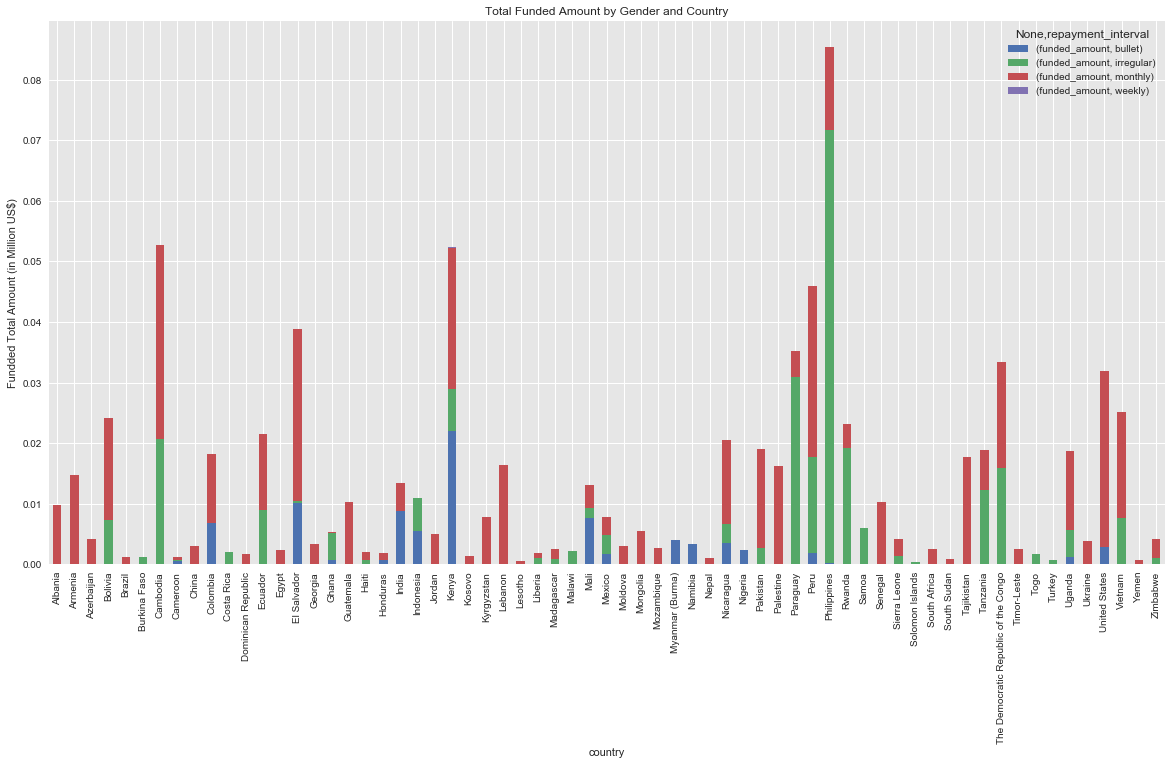

In [119]:
figure, ax = plt.subplots(figsize=(20,10))
(loan_data.groupby(
       ['country', 'repayment_interval']
    )[['funded_amount']].sum() / (1000 * 1000 )).reset_index().pivot(
    index='country', columns='repayment_interval'
).plot.bar(
    stacked=True,
    ax=ax
)
plt.ylabel('Fundded Total Amount (in Million US$)')
plt.title('Total Funded Amount by Repayment Interval and Country')
plt.show()

## By Sector

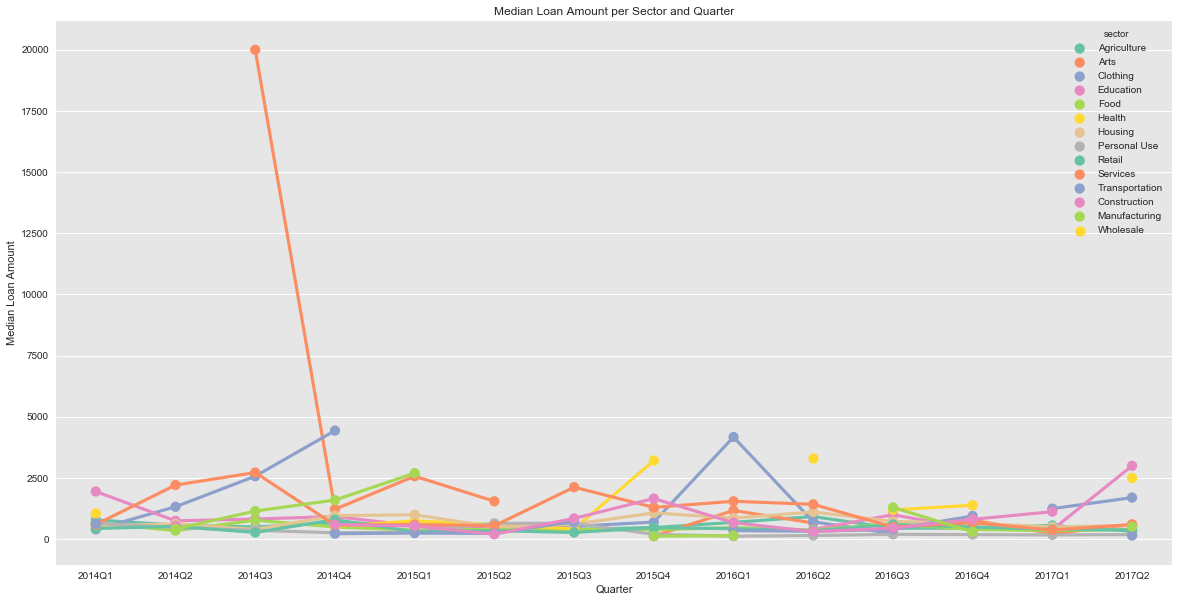

In [61]:
%run narcos/median_amount_per_sector.py
median_amount_per_sector(loan_data)

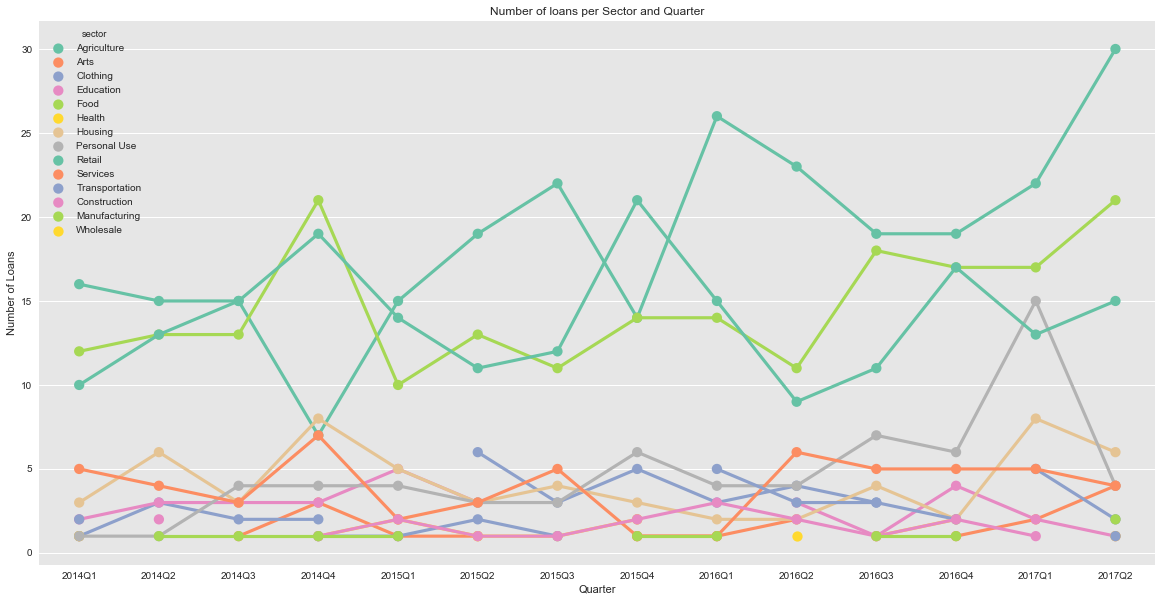

In [60]:
%run narcos/number_loans_per_sector.py
number_loans_per_sector(loan_data)

## Trend Over Time

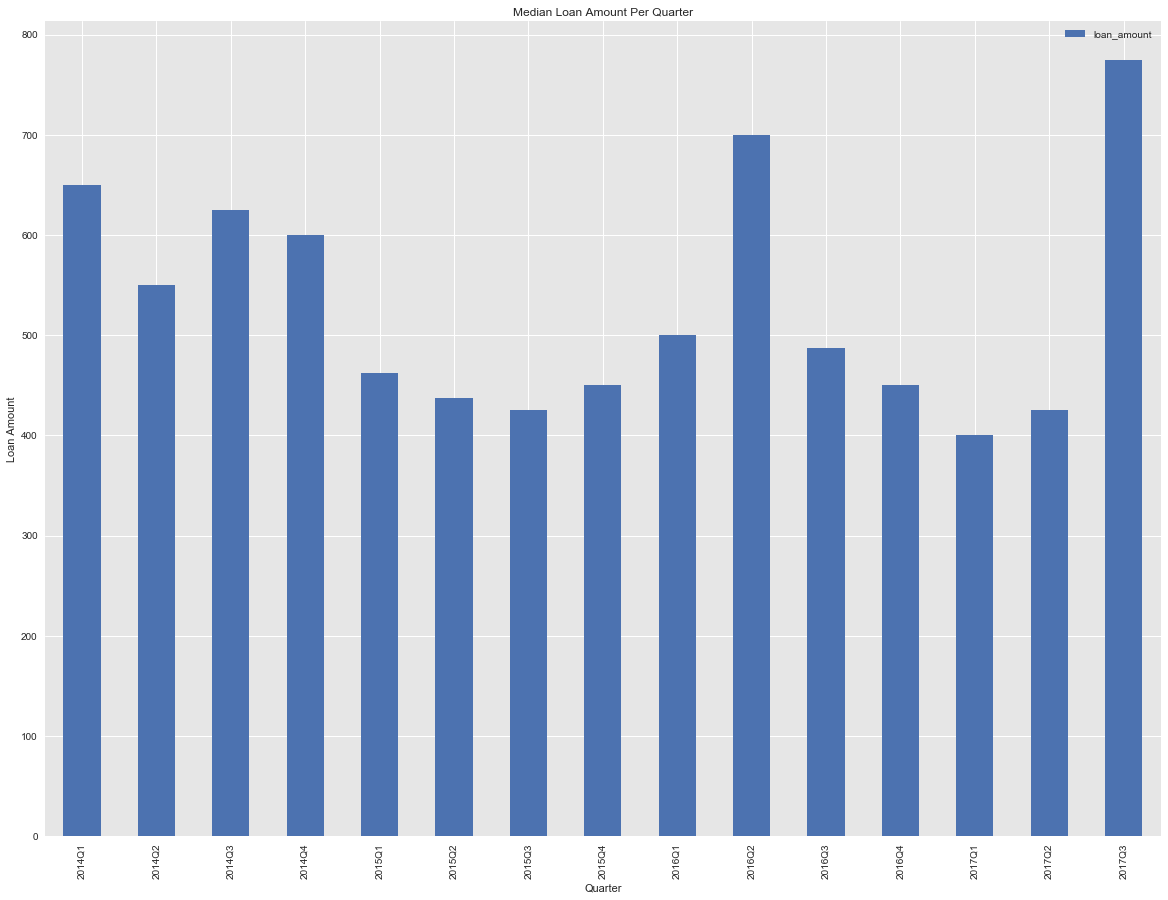

In [62]:
%run narcos/median_amount_per_quarter.py
median_amount_per_quarter(loan_data)

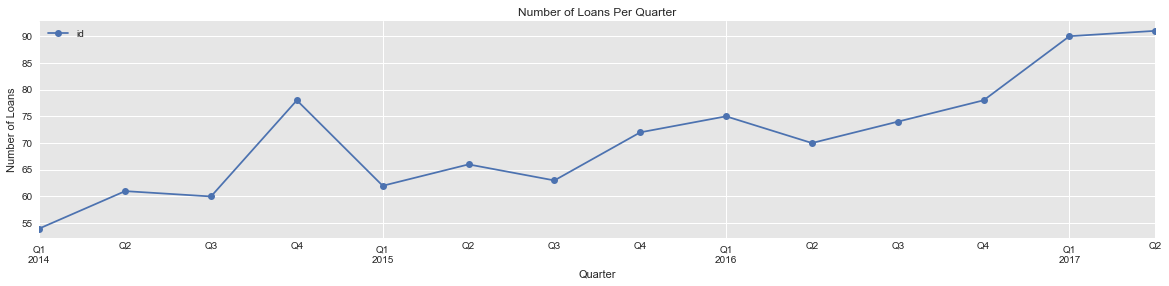

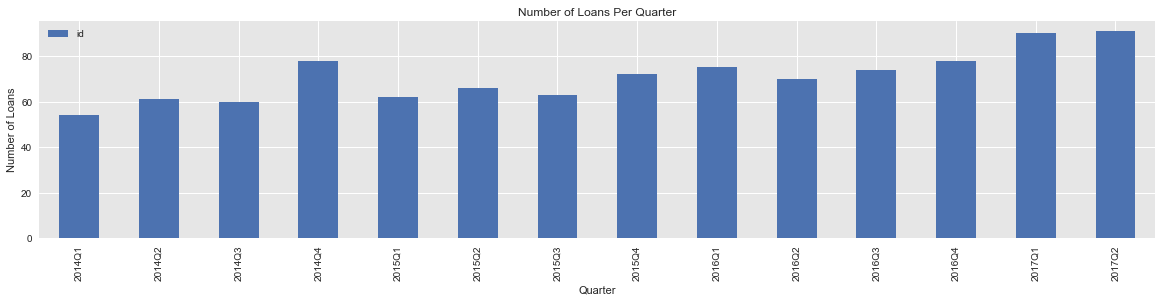

In [63]:
%run narcos/number_loans_per_quarter.py
number_loans_per_quarter(loan_data)

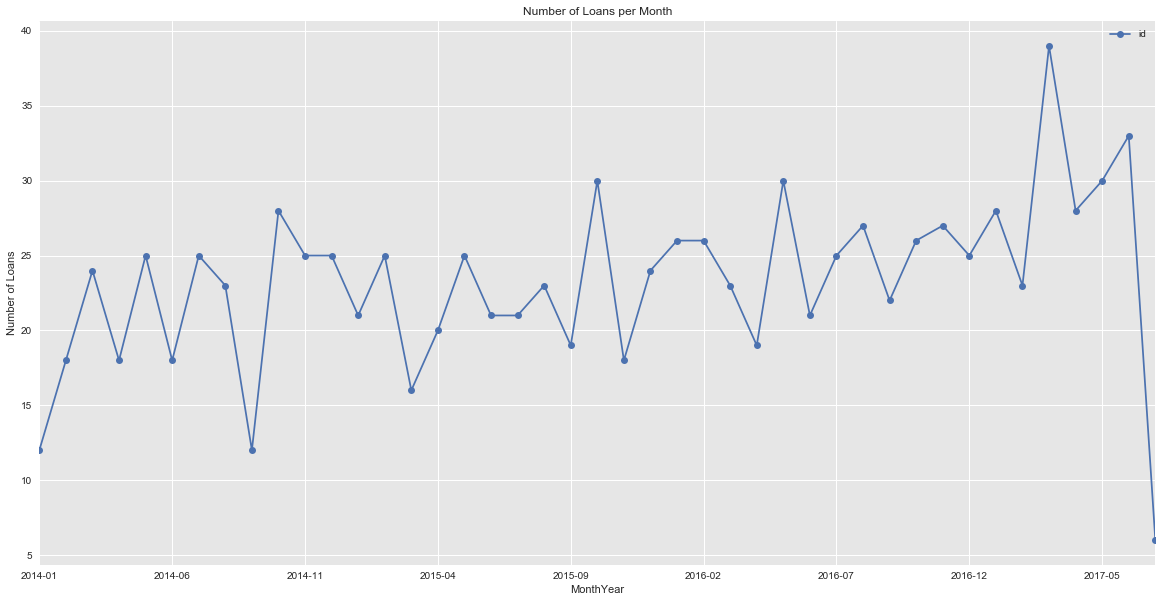

In [64]:
%run narcos/number_loans_per_month.py
number_loans_per_month(loan_data)

## By Gender

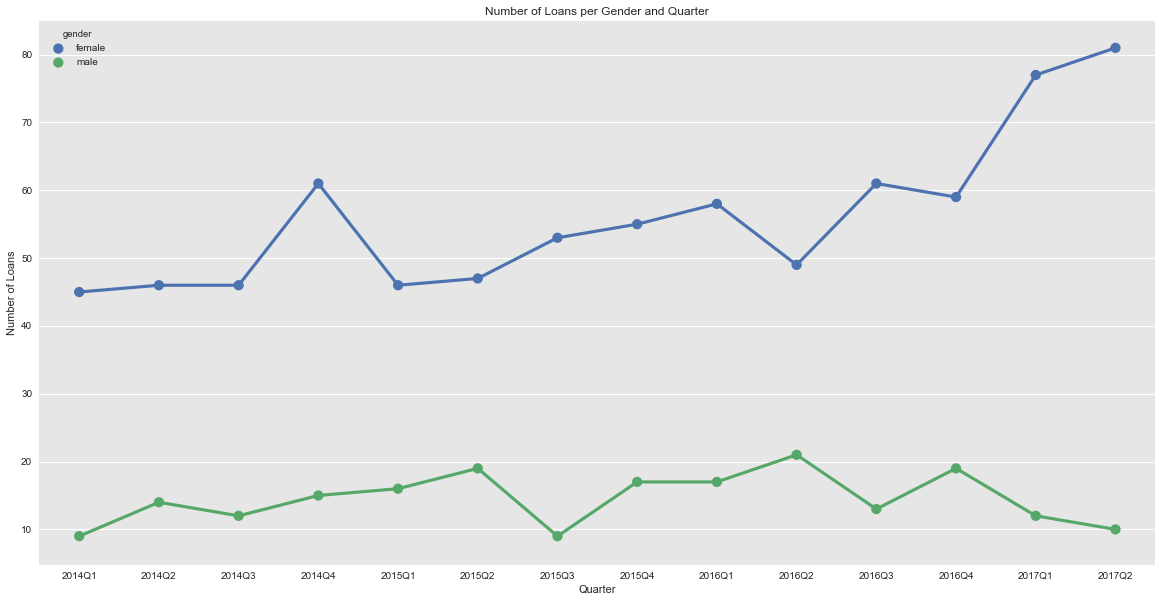

In [65]:
%run narcos/number_loans_per_gender.py
number_loans_per_gender(loan_data)

### World Cloud By Gender

Wordcloud shows display frequency of keyword. In this dataset, three columns are be ulized: Tags, Activities and Uses.

A very interesting fact found from this viz is that women and men are quiet different. For example, in activities, men are focus on agriculture, farming, and women are in general store, food production etc.

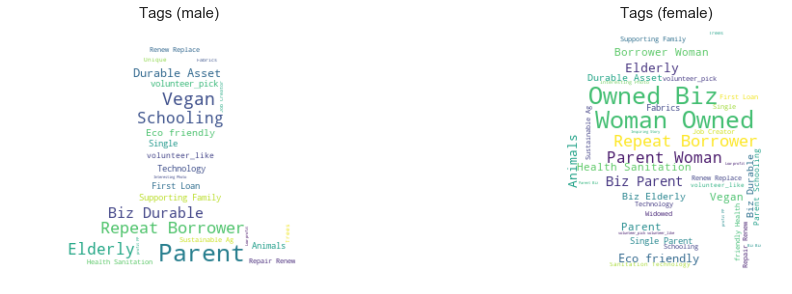

In [215]:
%run narcos/word_cloud.py
plot_all_and_genders_wordcloud(loan_data, 'tags')

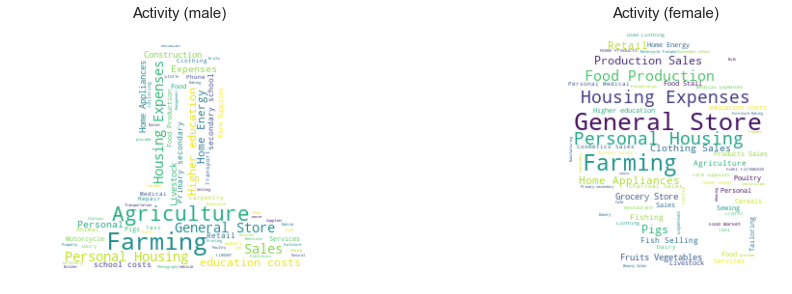

In [216]:
plot_all_and_genders_wordcloud(loan_data, 'activity')

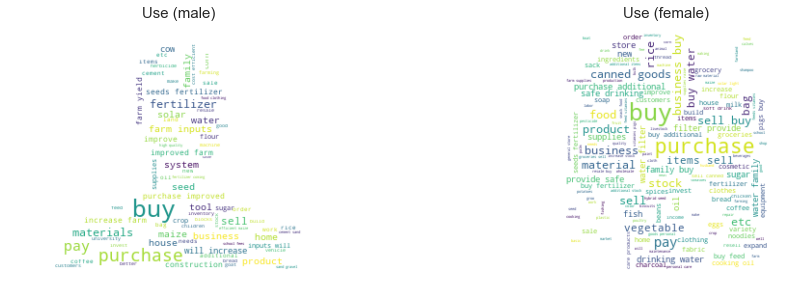

In [217]:
plot_all_and_genders_wordcloud(loan_data, 'use')

## By Country
This visualization provide a very straightfoward on how the loans are distribted geographically. 

From the view, Philipine received most loan in Aisa, Kenya in African and Pragury in American.

In [160]:
import plotly
%run narcos/map.py

py.iplot(plot_map(loan_data, by='sum'), validate=False, filename='d3-world-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~feng443/0 or inside your plot.ly account where it is named 'd3-world-map'


In [161]:
py.iplot(plot_map(loan_data, by='median'), validate=False, filename='d3-world-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~feng443/0 or inside your plot.ly account where it is named 'd3-world-map'


## Country by Loan

               country  loan_amount  loan_ranked
0               Brazil       1175.0          6.5
1         Burkina Faso       1275.0          8.5
2             Cameroon       1175.0          6.5
3           Costa Rica       2325.0         17.0
4   Dominican Republic       1675.0         11.0
5                Egypt       2450.0         18.0
6                Haiti       2050.0         15.0
7             Honduras       1850.0         14.0
8               Kosovo       1375.0         10.0
9              Lesotho        600.0          2.0
10             Liberia       1825.0         13.0
11              Malawi       2200.0         16.0
12          Mozambique       2625.0         21.0
13               Nepal       1100.0          5.0
14     Solomon Islands        450.0          1.0
15        South Africa       2575.0         19.0
16         South Sudan        950.0          4.0
17         Timor-Leste       2600.0         20.0
18                Togo       1775.0         12.0
19              Turk

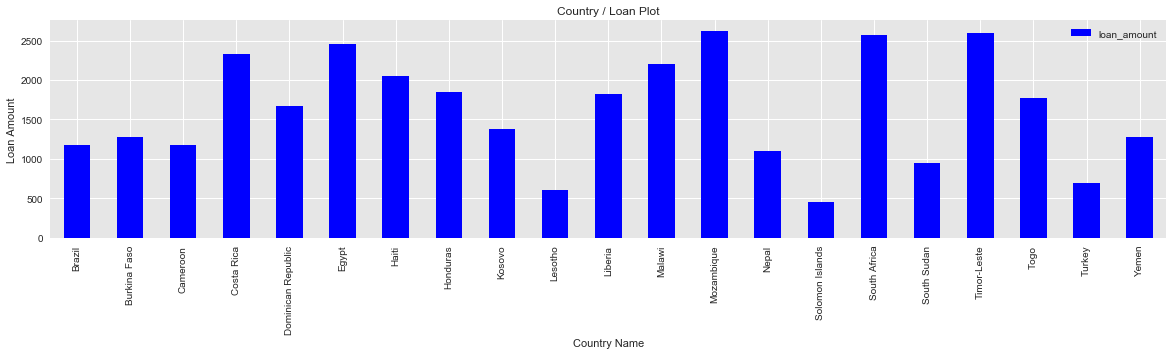

In [162]:
%run narcos/country_by_loan.py
plot_country_by_loan_amount(loan_data)

## Correlation Between Loan vs GDP

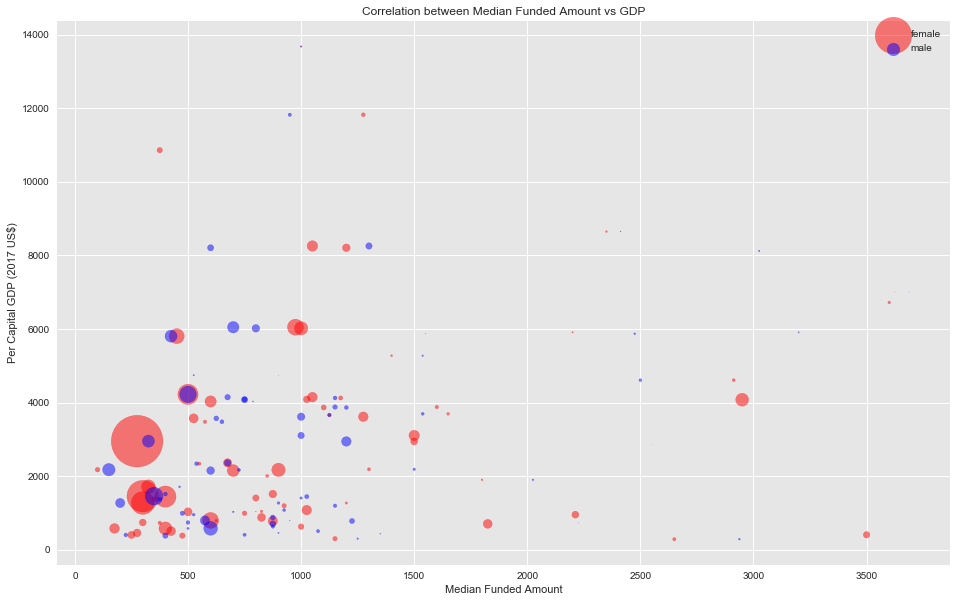

In [213]:
%run narcos/gdp_scatterplot.py
gdp_scatterplot(kiva_data)
# TODO: Add anotation